<a href="https://colab.research.google.com/github/kyurt/macd/blob/master/GLD_buy_sell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program uses the Moving Average Convergence/Divergence (MACD)
#             crossover to determine when to buy and sell a stock.

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [78]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving GLD.csv to GLD (1).csv


In [79]:
#Store the date into a df
df = pd.read_csv('GLD.csv')
#Set the date to be the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2015-09-28,2015-09-28,108.370003,108.910004,108.269997,108.419998,108.419998,3809600
2015-09-29,2015-09-29,108.239998,108.690002,107.879997,107.980003,107.980003,4043600
2015-09-30,2015-09-30,106.779999,107.080002,106.470001,106.860001,106.860001,7405600
2015-10-01,2015-10-01,106.980003,107.209999,106.629997,106.730003,106.730003,4278600
2015-10-02,2015-10-02,108.540001,109.320000,108.540001,108.989998,108.989998,7730600
...,...,...,...,...,...,...,...
2020-09-21,2020-09-21,179.839996,180.289993,176.750000,179.520004,179.520004,17436100
2020-09-22,2020-09-22,179.630005,180.020004,178.110001,178.649994,178.649994,7977900
2020-09-23,2020-09-23,176.979996,177.259995,174.100006,174.789993,174.789993,18134000
2020-09-24,2020-09-24,174.360001,176.240005,173.770004,175.440002,175.440002,11759200


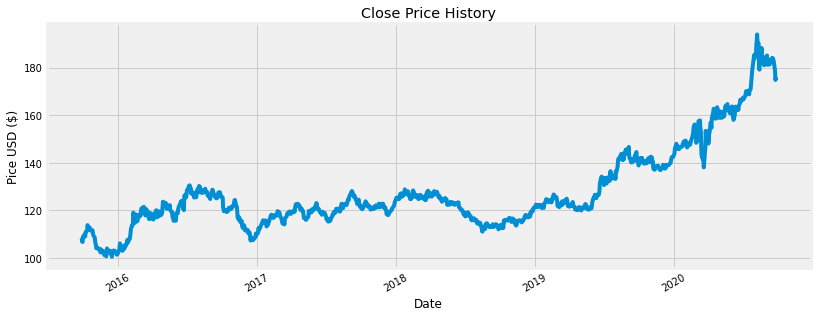

In [80]:
#Visally show the price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=30)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Pice USD ($)')
plt.show()


In [89]:
#Calculate the MAC and signal line indicators
#Calculate the short term exponential moving average (EMA)
shortEMA = df.Close.ewm(span=30, adjust=False).mean()
#Calculate the long term exponential moving average (EMA)
LongEMA  = df.Close.ewm(span=66, adjust=False).mean()
#Calculate the MACD line
MACD = shortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span=20, adjust=False).mean()


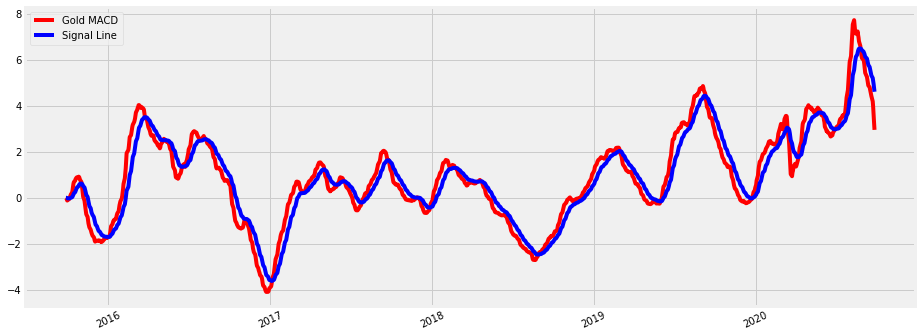

In [90]:
#plot the chart
plt.figure(figsize=(14.2, 5.5))
plt.plot(df.index, MACD, label = 'Gold MACD', color = 'red')
plt.plot(df.index, signal, label ='Signal Line', color = 'blue')
plt.xticks(rotation=25)
plt.legend(loc='upper left')
plt.show()

# New Section

# New Section

In [91]:
#create new columns for the data
df['MACD'] = MACD
df['Signal Line'] = signal
#show
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2015-09-28,2015-09-28,108.370003,108.910004,108.269997,108.419998,108.419998,3809600,0.000000,0.000000,NaN,NaN
2015-09-29,2015-09-29,108.239998,108.690002,107.879997,107.980003,107.980003,4043600,-0.015253,-0.001453,NaN,107.980003
2015-09-30,2015-09-30,106.779999,107.080002,106.470001,106.860001,106.860001,7405600,-0.067891,-0.007780,NaN,NaN
2015-10-01,2015-10-01,106.980003,107.209999,106.629997,106.730003,106.730003,4278600,-0.120039,-0.018471,NaN,NaN
2015-10-02,2015-10-02,108.540001,109.320000,108.540001,108.989998,108.989998,7730600,-0.088792,-0.025169,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-21,2020-09-21,179.839996,180.289993,176.750000,179.520004,179.520004,17436100,4.189785,5.207223,NaN,NaN
2020-09-22,2020-09-22,179.630005,180.020004,178.110001,178.649994,178.649994,7977900,3.943223,5.086842,NaN,NaN
2020-09-23,2020-09-23,176.979996,177.259995,174.100006,174.789993,174.789993,18134000,3.578050,4.943147,NaN,NaN
2020-09-24,2020-09-24,174.360001,176.240005,173.770004,175.440002,175.440002,11759200,3.262277,4.783064,NaN,NaN


In [92]:
#create a function to signal when to buy and sell an asset
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag =1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy, Sell)

In [93]:
#Create buy and sell column
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [94]:
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2015-09-28,2015-09-28,108.370003,108.910004,108.269997,108.419998,108.419998,3809600,0.000000,0.000000,NaN,NaN
2015-09-29,2015-09-29,108.239998,108.690002,107.879997,107.980003,107.980003,4043600,-0.015253,-0.001453,NaN,107.980003
2015-09-30,2015-09-30,106.779999,107.080002,106.470001,106.860001,106.860001,7405600,-0.067891,-0.007780,NaN,NaN
2015-10-01,2015-10-01,106.980003,107.209999,106.629997,106.730003,106.730003,4278600,-0.120039,-0.018471,NaN,NaN
2015-10-02,2015-10-02,108.540001,109.320000,108.540001,108.989998,108.989998,7730600,-0.088792,-0.025169,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-21,2020-09-21,179.839996,180.289993,176.750000,179.520004,179.520004,17436100,4.189785,5.207223,NaN,NaN
2020-09-22,2020-09-22,179.630005,180.020004,178.110001,178.649994,178.649994,7977900,3.943223,5.086842,NaN,NaN
2020-09-23,2020-09-23,176.979996,177.259995,174.100006,174.789993,174.789993,18134000,3.578050,4.943147,NaN,NaN
2020-09-24,2020-09-24,174.360001,176.240005,173.770004,175.440002,175.440002,11759200,3.262277,4.783064,NaN,NaN


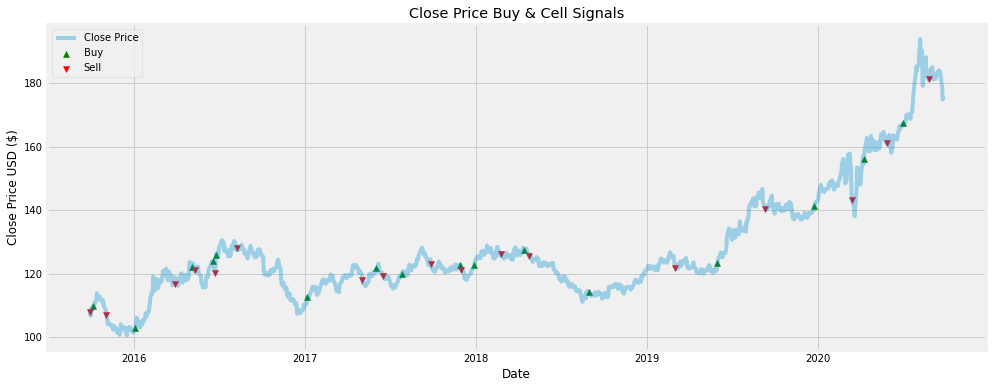

In [95]:
#Visally show the buy sell signals
plt.figure(figsize=(15.0, 6.0))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha =1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha =1)
plt.plot(df['Close'], label='Close Price', alpha = 0.35)
plt.title('Close Price Buy & Cell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()